In [11]:
from keras.layers import Input, Dense
from keras.models import Model
from keras.optimizers import Adam  
import numpy as np
from keras.datasets import fashion_mnist

# Load the Fashion MNIST dataset
(x_train, _), (x_test, _) = fashion_mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

# Introduce noise
noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)
x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

# Define the model
encoding_dim = 32
input_img = Input(shape=(784,))
encoded = Dense(encoding_dim, activation='relu')(input_img)
# Add the additional hidden layer
encoded = Dense(int(encoding_dim / 2), activation='relu')(encoded)
# Decoding part
decoded = Dense(encoding_dim, activation='relu')(encoded)
decoded = Dense(784, activation='sigmoid')(decoded)

# Create the autoencoder model
autoencoder = Model(input_img, decoded)
# Use Adam optimizer with a specified learning rate
adam_optimizer = Adam(learning_rate=0.001)
autoencoder.compile(optimizer=adam_optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = autoencoder.fit(x_train_noisy, x_train,
                epochs=50,  
                batch_size=256,
                shuffle=True,
                validation_data=(x_test_noisy, x_test))


Epoch 1/50

235/235 [==============================] - 6s 14ms/step - loss: 0.4435 - accuracy: 0.0078 - val_loss: 0.3688 - val_accuracy: 0.0094
Epoch 2/50
235/235 [==============================] - 3s 11ms/step - loss: 0.3511 - accuracy: 0.0081 - val_loss: 0.3411 - val_accuracy: 0.0094
Epoch 3/50
235/235 [==============================] - 3s 11ms/step - loss: 0.3336 - accuracy: 0.0113 - val_loss: 0.3324 - val_accuracy: 0.0096
Epoch 4/50
235/235 [==============================] - 3s 11ms/step - loss: 0.3276 - accuracy: 0.0121 - val_loss: 0.3281 - val_accuracy: 0.0098
Epoch 5/50
235/235 [==============================] - 3s 11ms/step - loss: 0.3236 - accuracy: 0.0118 - val_loss: 0.3246 - val_accuracy: 0.0121
Epoch 6/50
235/235 [==============================] - 3s 11ms/step - loss: 0.3204 - accuracy: 0.0125 - val_loss: 0.3218 - val_accuracy: 0.0132
Epoch 7/50
235/235 [==============================] - 2s 9ms/step - loss: 0.3181 - accuracy: 0.0131 - val_loss: 0.3199 - val_accuracy: 0.0141

313/313 [==============================] - 1s 3ms/step


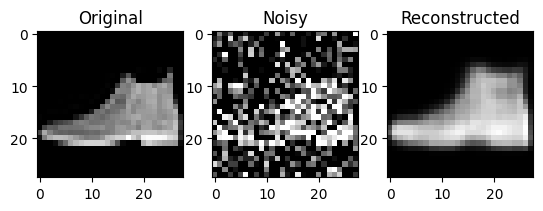

In [12]:

import matplotlib.pyplot as plt

# Get the reconstructed images
reconstructed_imgs = autoencoder.predict(x_test_noisy)

# Select one image to display
img_to_display = 0

# Display the original, noisy, and reconstructed images side by side
plt.subplot(1, 3, 1)
plt.imshow(x_test[img_to_display].reshape(28, 28))
plt.title('Original')

plt.subplot(1, 3, 2)
plt.imshow(x_test_noisy[img_to_display].reshape(28, 28))
plt.title('Noisy')

plt.subplot(1, 3, 3)
plt.imshow(reconstructed_imgs[img_to_display].reshape(28, 28))
plt.title('Reconstructed')

plt.show()


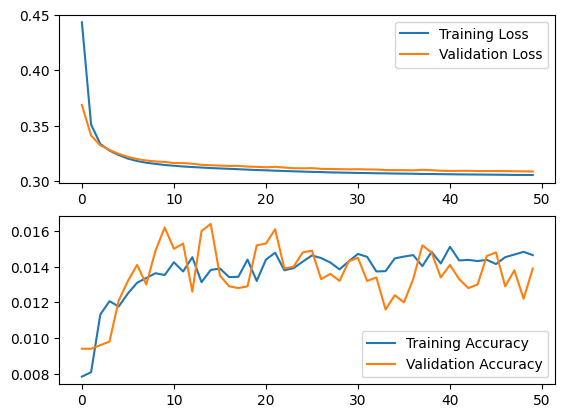

In [13]:

# Plot the loss and accuracy over epochs
plt.subplot(2, 1, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()

plt.show()